# Task 1

## Task 1.1

In [1]:
import numpy as np
from CartPole import *
from sklearn import linear_model

In [2]:
    def start_the_cart(initial_values1, initial_values2=None, initial_values3=None, steps=10, remap_angle=False, visual=False, display_plots=True, variable = None):

        cp = CartPole(visual=visual)
        cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity = initial_values1
        
        

        for step in range(steps):
            if visual: 
                cp.drawPlot()
            cp.performAction()
            if remap_angle: 
                cp.remap_angle()
            inter= [cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity]
            try: 
                x_history = np.vstack((x_history, np.array(inter)))
            except:
                x_history = np.vstack((np.array(initial_values1),np.array(inter)))
        

        
        x_axis=range(len(x_history))
        
        if initial_values2:
            cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity = initial_values2
        
           

            for step in range(steps):
                if visual: cp.drawPlot()
                cp.performAction()
                if remap_angle: cp.remap_angle()
                inter= [cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity]
                try: 
                    y_history = np.vstack((y_history, np.array(inter)))
                except:
                    y_history = np.vstack((np.array(initial_values2),np.array(inter)))
        
        if initial_values3:
            cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity = initial_values3
        
            

            for step in range(steps):
                if visual: cp.drawPlot()
                cp.performAction()
                if remap_angle: cp.remap_angle()
                inter= [cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity]
                try: 
                    z_history = np.vstack((z_history, np.array(inter)))
                except:
                    z_history = np.vstack((np.array(initial_values3),np.array(inter)))
        
        if display_plots:
            fig, axs = plt.subplots(2, 2, figsize=(10, 7))

            axs[0,0].plot(x_axis, [x[0] for x in x_history],label='First')
            if initial_values2: axs[0,0].plot(x_axis, [x[0] for x in y_history],label='Second')
            if initial_values3: axs[0,0].plot(x_axis, [x[0] for x in z_history],label='Third')

            axs[0,1].plot(x_axis, [x[1] for x in x_history])
            if initial_values2: axs[0,1].plot(x_axis, [x[1] for x in y_history])
            if initial_values3: axs[0,1].plot(x_axis, [x[1] for x in z_history])
           
            axs[1,0].plot(x_axis, [x[2] for x in x_history])
            if initial_values2: axs[1,0].plot(x_axis, [x[2] for x in y_history])
            if initial_values3: axs[1,0].plot(x_axis, [x[2] for x in z_history])
            
            axs[1,1].plot(x_axis, [x[3] for x in x_history])
            if initial_values2: axs[1,1].plot(x_axis, [x[3] for x in y_history])
            if initial_values3: axs[1,1].plot(x_axis, [x[3] for x in z_history])
            
            #Set titles
            axs[0,0].set_title('Cart location')
            axs[0,0].set_xlabel('Steps')
            axs[0,0].set_ylabel('x')

            axs[0,1].set_title('Cart velocity')
            axs[0,1].set_xlabel('Steps')
            axs[0,1].set_ylabel('x_dot')


            axs[1,0].set_title('Pole angle')
            axs[1,0].set_xlabel('Steps')
            axs[1,0].set_ylabel('theta')

            axs[1,1].set_title('Pole velocity')
            axs[1,1].set_xlabel('Steps')
            axs[1,1].set_ylabel('theta_dot')

            if variable: fig.suptitle(('Effect of different initial {} on cart dynamics').format(variable),fontsize=16)

            fig.legend()
            fig.tight_layout()
        
        
        return x_history[-1]

### Stable equilibrium

In [3]:
#history = start_the_cart([0,0,np.pi,1],[0,0,np.pi,5],[0,0,np.pi,10],visual=False,remap_angle=False,variable = 'Pole Velocity')


### Complete rotation of pendulum

In [4]:
#history = start_the_cart([0,0,np.pi,15],visual=False,remap_angle=False)

## Task 1.2

In [5]:
initialize = np.array([np.random.uniform(-5,5), np.random.uniform(-10, 10), np.random.uniform(-np.pi,np.pi), np.random.uniform(-15,15)])
#print(initialize)

In [6]:
variable_number={0:'Cart location',1:'Cart velocity',2:'Pole angle',3:'Pole velocity'}

In [7]:
def one_step(variable, x_axis_range, x_axis_intervals):
    
    
    
    x = initialize.copy()
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1
    for i in x_axis:
        x[variable] = i
        y = start_the_cart(x, steps=steps, display_plots=False)

        try: 
            final_y = np.vstack((final_y, np.array(y)))
        except:
            final_y = np.array(y)

    fig, axs = plt.subplots(2, 2, figsize=(10, 7))
    axs[0,0].plot(x_axis, [y[0] for y in final_y])
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])
   
    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    

    #Set titles
            
    axs[0,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,0].set_ylabel('Cart location')

    
    axs[0,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,1].set_ylabel('Cart velocity')

    
    axs[1,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,0].set_ylabel('Pole angle')

    
    axs[1,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,1].set_ylabel('Pole velocity')

    fig.suptitle(('Effect of initial {} on cart dynamics after {} step'.format(variable_number[variable],steps)),fontsize=16)

    fig.tight_layout()

### Vary cart location


In [8]:
#one_step(0,[-5,5],15)

### Vary cart velocity

In [9]:
#one_step(1,[-10,10],15)

### Vary pole angle

In [10]:
#one_step(2,[-np.pi,np.pi],15)

### Vary pole velocity

In [11]:
#one_step(3,[-15,15],15)

### Creating a variable "y", the difference between x

In [12]:
def one_step_difference(variable, x_axis_range, x_axis_intervals):

    x = initialize.copy()
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1
    for i in x_axis:
        x[variable] = i
        x_t = start_the_cart(x, steps=steps, display_plots=False)
        y = x_t-x
        
        try: 
            final_y = np.vstack((final_y, np.array(y)))
        except:
            final_y = np.array(y)
   

    fig, axs = plt.subplots(2, 2, figsize=(10, 7))
    axs[0,0].plot(x_axis, [y[0] for y in final_y])
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])

    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    

    #Set titles
            
    axs[0,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,0].set_ylabel('Cart location change')

    
    axs[0,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,1].set_ylabel('Cart velocity change')

    
    axs[1,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,0].set_ylabel('Pole angle change')

    
    axs[1,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,1].set_ylabel('Pole velocity change')

    fig.suptitle(('Effect of initial {} on cart dynamics after {} step'.format(variable_number[variable],steps)),fontsize=16)

    fig.tight_layout()

    return final_y

In [13]:
def one_step_difference_2(variable, x_axis_range, x_axis_intervals):

    x = initialize.copy()
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1
    for i in x_axis:
        x[variable] = i
        x_t = start_the_cart(x, steps=steps, display_plots=False,remap_angle=True)
        y = x_t-x
        
        try: 
            final_y = np.vstack((final_y, np.array(y)))
        except:
            final_y = np.array(y)


    return x_axis, final_y

In [14]:
def together_plot_1_2():
    x_axis1, c_l_real = one_step_difference_2(0,[-5,5],15)
    x_axis2,c_v_real = one_step_difference_2(1,[-10,10],15)
    x_axis3,p_a_real = one_step_difference_2(2,[-np.pi,np.pi],15)
    x_axis4,p_v_real = one_step_difference_2(3,[-15,15],15)

    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    for i in range(4):
        axs[0,0].plot(x_axis1, [y[i] for y in c_l_real],label='{}'.format(variable_number[i]))
    
        
        
        
        axs[0,1].plot(x_axis2, [y[i] for y in c_v_real],label='Real c_v')
  

        axs[1,0].plot(x_axis3, [y[i] for y in p_a_real],label='Real p_a')
     
        
        axs[1,1].plot(x_axis4, [y[i] for y in p_v_real],label='Real p_v')
  

        
        axs[0,0].legend()


    axs[0,0].set_xlabel('Initial value of cart location')
    axs[0,0].set_ylabel('Cart dynamics changes')

    axs[0,1].set_xlabel('Initial value of cart velocity')
    axs[0,1].set_ylabel('Cart dynamics changes')

    axs[1,0].set_xlabel('Initial value of pole angle')
    axs[1,0].set_ylabel('Cart dynamics changes')

    axs[1,1].set_xlabel('Initial value of pole velocity')
    axs[1,1].set_ylabel('Cart dynamics changes')

    fig.tight_layout()
        
    plt.show()

### (i) Scans of single relationships

In [15]:
#together_plot_1_2()

### (ii) Contour plots

In [16]:
different_pairs = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
axes_ranges = {0 : np.linspace(-5,5,10), 1 : np.linspace(-10,10,10), 2 : np.linspace(-np.pi,np.pi,10), 3 : np.linspace(-15,15,10)}

def axes_for_pairs(index_pair):
    range_of_variables = []
    for index in index_pair:
        range_of_variables.append(axes_ranges[index])
    return range_of_variables

def contours_of_pairs(index_pair, range_of_variables):
  
   
    index_1, index_2 = index_pair
    range_1, range_2 = range_of_variables
    
    initial_grid = np.zeros((len(range_1),len(range_2),4))
    final_grid = np.zeros((len(range_1),len(range_2),4))
    
    for i,value_1 in enumerate(range_1):
        for j, value_2 in enumerate(range_2):
            x = initialize.copy()
            x[index_1] = value_1
            x[index_2] = value_2
            initial_grid[i,j] = x
            final_grid[i,j] = np.array(start_the_cart(x, steps=1, display_plots=False))
                            
    y_grid = final_grid - initial_grid
    y_grid = np.moveaxis(y_grid, -1, 0)   
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 9))
    
    axs[0,0].contourf(range_1, range_2, y_grid[0].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[0,0].set_title('cart_location')
    axs[0,0].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[0,0].set_ylabel('{} initial value'.format(variable_number[index_2]))   

    axs[0,1].contourf(range_1, range_2, y_grid[1].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[0,1].set_title('cart_velocity')
    axs[0,1].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[0,1].set_ylabel('{} initial value'.format(variable_number[index_2]))

    axs[1,0].contourf(range_1, range_2, y_grid[2].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[1,0].set_title('pole_angle')
    axs[1,0].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[1,0].set_ylabel('{} initial value'.format(variable_number[index_2]))

    axs[1,1].contourf(range_1, range_2, y_grid[3].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[1,1].set_title('pole_velocity')
    axs[1,1].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[1,1].set_ylabel('{} initial value'.format(variable_number[index_2]))
    
    fig.tight_layout()

In [17]:
"""
for indices in different_pairs:
     print('Plots of {} and {}'.format(variable_number[indices[0]],variable_number[indices[1]]))
     contours_of_pairs(indices, axes_for_pairs(indices))
     plt.show()
"""  

"\nfor indices in different_pairs:\n     print('Plots of {} and {}'.format(variable_number[indices[0]],variable_number[indices[1]]))\n     contours_of_pairs(indices, axes_for_pairs(indices))\n     plt.show()\n"

## Task 1.3

In [18]:
def get_xy_pairs(n):
    
    for iteration in range(n):
        random_point= np.array([np.random.uniform(-5,5), np.random.uniform(-10, 10), np.random.uniform(-np.pi,np.pi), np.random.uniform(-15,15)])
        y = start_the_cart(random_point,steps=1, remap_angle=True,display_plots=False)
        try: 
            final_y = np.vstack((final_y, np.array(y)))
            final_x = np.vstack((final_x, np.array(random_point)))
        except:
            final_y = np.array(y)
            final_x = np.array(random_point)
        

    return final_x,final_y-final_x

In [19]:
x,y= get_xy_pairs(500)
get_xy_pairs(5)

(array([[  2.0391187 ,  -2.58962667,  -1.49447952,   7.16125055],
        [ -2.14334292,  -8.78364149,   2.85090153,  10.47126416],
        [ -4.41665635,   9.67748261,  -1.30166059, -12.24995316],
        [ -1.30602172,  -0.84625417,   1.28429698, -12.57152956],
        [ -0.8054512 ,  -0.07033263,   1.11491541, -11.37327397]]),
 array([[-5.63496696e-01, -1.82351243e-01,  8.77034868e-01,
         -5.22924218e+00],
        [-1.85706588e+00, -1.32471481e+00, -4.47298475e+00,
         -4.17345868e+00],
        [ 1.59946663e+00, -1.29999701e+00,  3.35466602e+00,
         -1.79025722e+00],
        [-4.35918193e-03,  4.78664995e-01, -2.27749679e+00,
          6.96727284e-01],
        [ 9.97599734e-02,  2.63173873e-01, -2.05973092e+00,
          4.84688421e-01]]))

In [20]:
#Create train and test sets
proportion = 0.95
number_of_samples = 500
cutoff = int(proportion*number_of_samples)
train_x= x[:cutoff]
test_x=x[cutoff:]

train_y=y[:cutoff]
test_y=y[cutoff:]


In [21]:
model = linear_model.LinearRegression()
model.fit(train_x,train_y)
n=model.predict(test_x)

In [22]:
def predict(train_x, test_x, train_y):
    W = np.matmul(np.linalg.pinv(train_x),train_y)
    prediction = np.matmul(test_x,W)
    return prediction,W
    


In [23]:
m,W = predict(train_x, test_x, train_y)


### First plot. Real and predicted plotted against initial

In [24]:
def vertical_plot(input,next_step,pred_next_step):

    fig, axs = plt.subplots(2, 2, figsize=(10, 7))

    axs[0,0].scatter([x[0] for x in input],[y[0] for y in next_step],label='Real value')
    axs[0,0].scatter([x[0] for x in input],[y[0] for y in pred_next_step],label='Predicted Value')
    axs[0,0].set_xlabel('Cart location initial value')
    axs[0,0].set_ylabel('Cart location final value')
    axs[0,0].legend()

    axs[0,1].scatter([x[1] for x in input],[y[1] for y in next_step])
    axs[0,1].scatter([x[1] for x in input],[y[1] for y in pred_next_step])
    axs[0,1].set_xlabel('Cart velocity initial value')
    axs[0,1].set_ylabel('Cart velocity final value')

    axs[1,0].scatter([x[2] for x in input],[y[2] for y in next_step])
    axs[1,0].scatter([x[2] for x in input],[y[2] for y in pred_next_step])
    axs[1,0].set_xlabel('Pole angle initial value')
    axs[1,0].set_ylabel('Pole angle final value')

    axs[1,1].scatter([x[3] for x in input],[y[3] for y in next_step])
    axs[1,1].scatter([x[3] for x in input],[y[3] for y in pred_next_step])
    axs[1,1].set_xlabel('Pole velocity initial value')
    axs[1,1].set_ylabel('Pole velocity final value')

    fig.suptitle('Predictions vs Real values after 1 step plotted against various initial values')
    fig.tight_layout()

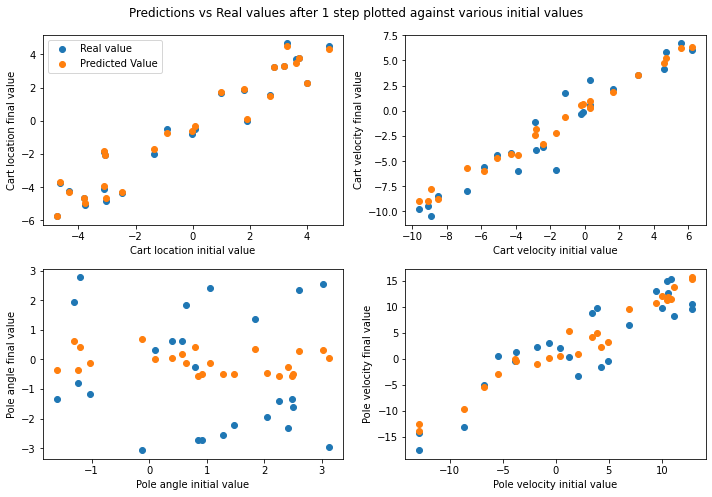

In [25]:
vertical_plot(test_x,test_y+test_x,m+test_x)

In [162]:
def rmse_calc(A,B):
    squared = (A-B)**2
    cl_mse =0
    cv_mse=0
    pa_mse=0
    pv_mse=0
    for row in squared:

        cl_mse+=row[0]
        cv_mse+=row[1]
        pa_mse+=row[2]
        pv_mse+=row[3]
    cl_mse=(cl_mse/len(squared))**0.5
    cv_mse=(cv_mse/len(squared))**0.5
    pa_mse=(pa_mse/len(squared))**0.5
    pv_mse=(pv_mse/len(squared))**0.5


    return np.array([cl_mse,cv_mse,pa_mse,pv_mse])

In [163]:
rmse_calc(test_y,n)

array([1499.79781093, 1500.11652078, 1499.83986887, 1499.65921311])

In [28]:
rmse_calc(test_y,m)

(0.1415722091310056,
 1.3878189707443709,
 1.7876589508979601,
 3.6268791104874754)

### second plot. This one is real vs predicted only

In [29]:
def real_vs_predicted(real,predicted):
    fig, axs = plt.subplots(2, 2, figsize=(10, 7))

    axs[0,0].scatter([x[0] for x in real],[y[0] for y in predicted])
   
    axs[0,0].set_xlabel('Cart location real value')
    axs[0,0].set_ylabel('Cart location predicted value')
    

    axs[0,1].scatter([x[1] for x in real],[y[1] for y in predicted])
    axs[0,1].set_xlabel('Cart velocity real value')
    axs[0,1].set_ylabel('Cart velocity predicted value')

    axs[1,0].scatter([x[2] for x in real],[y[2] for y in predicted])
    axs[1,0].set_xlabel('Pole angle real value')
    axs[1,0].set_ylabel('Pole angle predicted value')

    axs[1,1].scatter([x[3] for x in real],[y[3] for y in predicted])
    axs[1,1].set_xlabel('Pole velocity real value')
    axs[1,1].set_ylabel('Pole velocity predicted value')

    fig.suptitle('Predictions vs Real values after 1 step')
    fig.tight_layout()

In [30]:
#real_vs_predicted(test_y+test_x,m+test_x)

### Scans with varying parameters

In [31]:
def one_step_difference_with_predictions_2(variable, x_axis_range, x_axis_intervals):
    x = [-0.24,-9.27,-1.07,9.09]
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1

    for i in x_axis:
        x[variable] = i
        x_t = start_the_cart(x, steps=steps, display_plots=False,remap_angle=True)
        y = x_t-x
        pred = model.predict([x])
        try: 
            final_y = np.vstack((final_y, np.array(y)))
            final_pred = np.vstack((final_pred,np.array(pred)))
        except:
            final_y = np.array(y)
            final_pred = np.array(pred)



    return x_axis,final_y,final_pred

In [32]:
def together_plot():
    x_axis1, c_l_real,c_l_pred = one_step_difference_with_predictions_2(0,[-5,5],15)
    x_axis2,c_v_real,c_v_pred = one_step_difference_with_predictions_2(1,[-10,10],15)
    x_axis3,p_a_real,p_a_pred = one_step_difference_with_predictions_2(2,[-np.pi,np.pi],15)
    x_axis4,p_v_real,p_v_pred = one_step_difference_with_predictions_2(3,[-15,15],15)

    fig, axs = plt.subplots(2, 2, figsize=(17, 11))
    for i in range(4):
        axs[0,0].plot(x_axis1, [y[i] for y in c_l_real],label='Real {}'.format(variable_number[i]))
        axs[0,0].scatter(x_axis1, [y[i] for y in c_l_pred],label='Predicted {}'.format(variable_number[i]))
        
        
        
        axs[0,1].plot(x_axis2, [y[i] for y in c_v_real],label='Real c_v')
        axs[0,1].scatter(x_axis2, [y[i] for y in c_v_pred],label='Predicted c_v')

        axs[1,0].plot(x_axis3, [y[i] for y in p_a_real],label='Real p_a')
        axs[1,0].scatter(x_axis3, [y[i] for y in p_a_pred],label='Predicted p_a')
        
        axs[1,1].plot(x_axis4, [y[i] for y in p_v_real],label='Real p_v')
        axs[1,1].scatter(x_axis4, [y[i] for y in p_v_pred],label='Predicted p_v')

        
        axs[0,0].legend()


    axs[0,0].set_xlabel('Initial value of cart location')
    axs[0,0].set_ylabel('Cart dynamics changes')

    axs[0,1].set_xlabel('Initial value of cart velocity')
    axs[0,1].set_ylabel('Cart dynamics changes')

    axs[1,0].set_xlabel('Initial value of pole angle')
    axs[1,0].set_ylabel('Cart dynamics changes')

    axs[1,1].set_xlabel('Initial value of pole velocity')
    axs[1,1].set_ylabel('Cart dynamics changes')

    fig.tight_layout()
    
        
    plt.show()

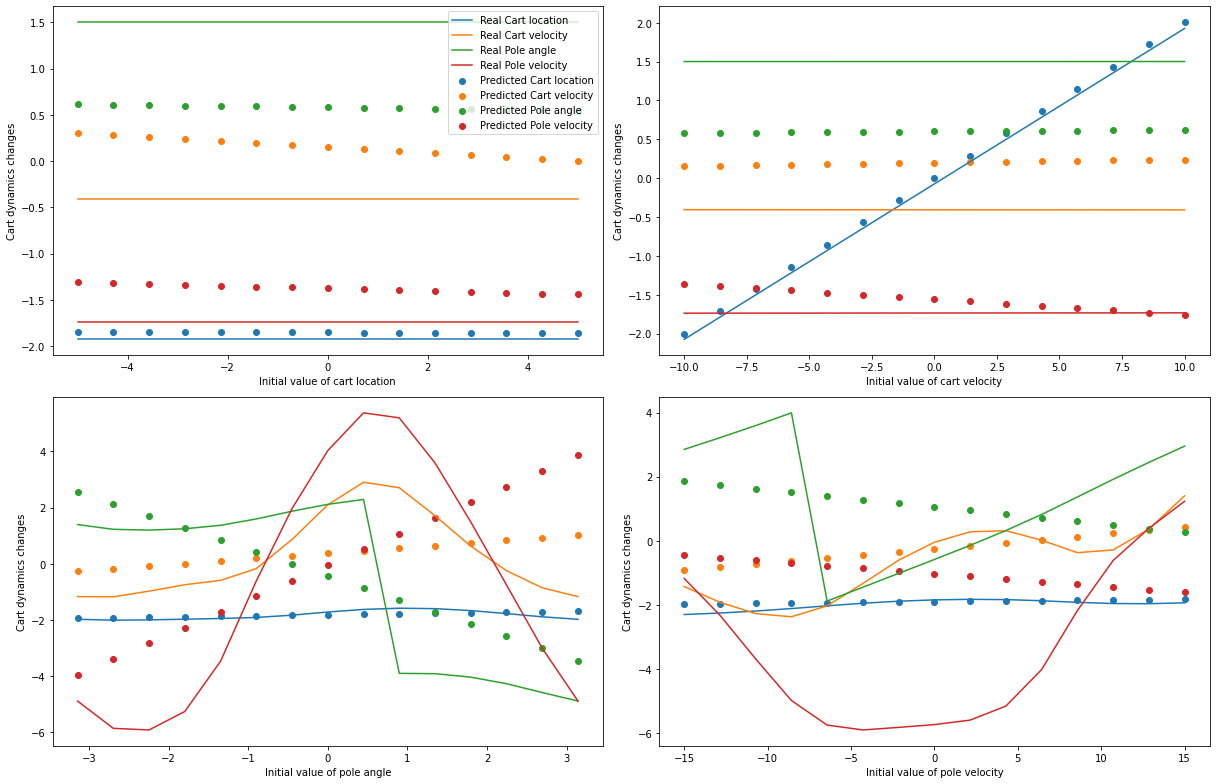

In [33]:
together_plot()


## Task 1.4

In [34]:
def future_predictions_from_predictions(initial_conditions, time_steps,remap_angle=True):
    final_y=np.array(initial_conditions)
    final_pred=np.array(initial_conditions)

    for i in range(time_steps):
        real= start_the_cart(final_y[i], steps=1, display_plots=False,remap_angle=remap_angle)
        pred = np.matmul(final_pred[i],W)
        pred+=final_pred[i]

         
        final_y = np.vstack((final_y, np.array(real)))
        final_pred = np.vstack((final_pred,np.array(pred)))

    x_axis=np.linspace(0,time_steps,time_steps+1)
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0,0].plot(x_axis, [y[0] for y in final_y],label='Real value')
    axs[0,0].plot(x_axis, [y[0] for y in final_pred],label='Predicted value')
    axs[0,0].legend()
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])
    axs[0,1].plot(x_axis, [y[1] for y in final_pred])

    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    axs[1,0].plot(x_axis, [y[2] for y in final_pred])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    axs[1,1].plot(x_axis, [y[3] for y in final_pred])
    

    #Set titles
            
    axs[0,0].set_xlabel('Time steps')
    axs[0,0].set_ylabel('Cart location')

    
    axs[0,1].set_xlabel('Time steps')
    axs[0,1].set_ylabel('Cart velocity')

    
    axs[1,0].set_xlabel('Time steps')
    axs[1,0].set_ylabel('Pole angle')

    
    axs[1,1].set_xlabel('Time steps')
    axs[1,1].set_ylabel('Pole velocity')

    fig.suptitle('Predicted (from predictions) vs Real change in cart dynamics over time with initial conditions {}'.format(initial_conditions),fontsize=16)

    fig.tight_layout()

    

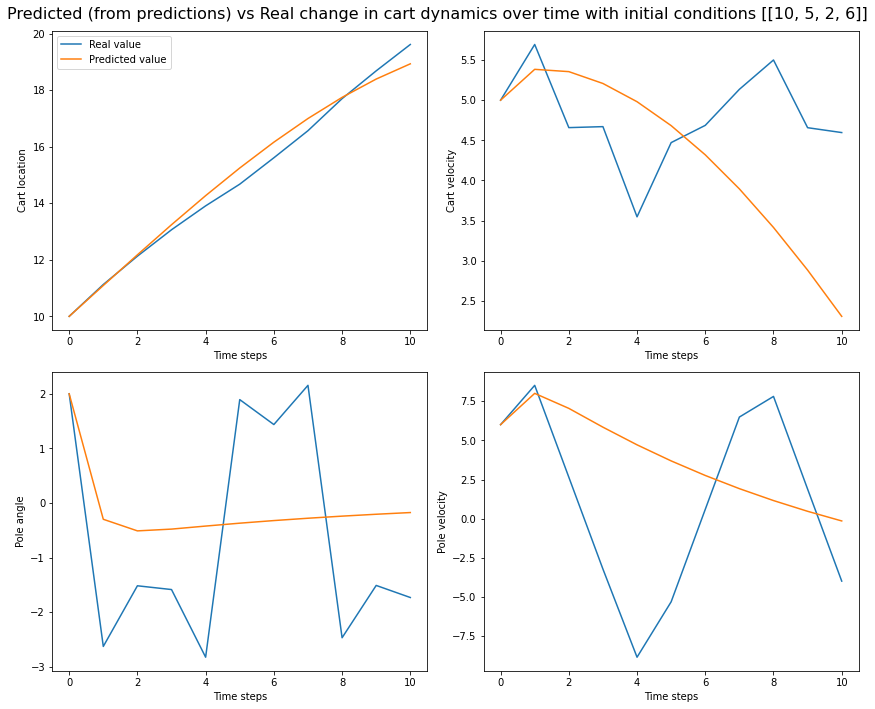

In [168]:
future_predictions_from_predictions([[10,5,2,6]],10,remap_angle=True)

In [36]:
#future_predictions_from_predictions([[0,0,np.pi,15]],10,remap_angle=True)

In [37]:
def future_predictions_from_real(initial_conditions, time_steps,remap_angle=True):
    final_y=np.array(initial_conditions)
    final_pred=np.array(initial_conditions)

    for i in range(time_steps):
        real= start_the_cart(final_y[i], steps=1, display_plots=False,remap_angle=remap_angle)
        pred = np.matmul(final_y[i],W)
        pred+=final_y[i]

         
        final_y = np.vstack((final_y, np.array(real)))
        final_pred = np.vstack((final_pred,np.array(pred)))

    x_axis=np.linspace(0,time_steps,time_steps+1)
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0,0].plot(x_axis, [y[0] for y in final_y],label='Real value')
    axs[0,0].plot(x_axis, [y[0] for y in final_pred],label='Predicted value')
    axs[0,0].legend()
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])
    axs[0,1].plot(x_axis, [y[1] for y in final_pred])

    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    axs[1,0].plot(x_axis, [y[2] for y in final_pred])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    axs[1,1].plot(x_axis, [y[3] for y in final_pred])
    

    #Set titles
            
    axs[0,0].set_xlabel('Time steps')
    axs[0,0].set_ylabel('Cart location')

    
    axs[0,1].set_xlabel('Time steps')
    axs[0,1].set_ylabel('Cart velocity')

    
    axs[1,0].set_xlabel('Time steps')
    axs[1,0].set_ylabel('Pole angle')

    
    axs[1,1].set_xlabel('Time steps')
    axs[1,1].set_ylabel('Pole velocity')

    fig.suptitle('Predicted (from recent dynamics) vs Real change in cart dynamics over time with initial conditions {}'.format(initial_conditions),fontsize=16)

    fig.tight_layout()

In [38]:
#future_predictions_from_real([[10,5,2,6]],10,remap_angle=True)


In [39]:
#future_predictions_from_real([[0,0,np.pi,15]],10,remap_angle=True)

### Here I will train the model on non-remapped angle to see the effect

In [40]:
def get_xy_pairs_2(n):
    
    for iteration in range(n):
        random_point= np.array([np.random.uniform(-5,5), np.random.uniform(-10, 10), np.random.uniform(-np.pi,np.pi), np.random.uniform(-15,15)])
        y = start_the_cart(random_point,steps=1, remap_angle=False,display_plots=False)
        try: 
            final_y = np.vstack((final_y, np.array(y)))
            final_x = np.vstack((final_x, np.array(random_point)))
        except:
            final_y = np.array(y)
            final_x = np.array(random_point)
        

    return final_x,final_y-final_x

In [41]:
x2,y2= get_xy_pairs_2(500)

In [42]:
#Create train and test sets
proportion = 0.95
number_of_samples = 500
cutoff = int(proportion*number_of_samples)
train_x2= x2[:cutoff]
test_x2=x2[cutoff:]

train_y2=y2[:cutoff]
test_y2=y2[cutoff:]


In [43]:
r,B = predict(train_x2, test_x2, train_y2)

In [44]:
print(B)

[[-1.04956682e-03 -2.75620728e-02 -4.44931626e-04 -3.14420616e-02]
 [ 2.00739289e-01  5.44491336e-03  4.77612745e-03  4.08781025e-02]
 [ 3.71126201e-02  1.44240831e-01  1.57395759e-01  1.14167666e+00]
 [ 9.85245434e-04  1.98179875e-03  1.93111324e-01 -1.03945463e-01]]


In [45]:
np.linalg.eigvals(W)


array([ 0.00393712+0.08796235j,  0.00393712-0.08796235j,
       -0.12163937+0.j        , -0.87924048+0.j        ])

In [46]:
np.linalg.eigvals(B)

array([ 5.16025585e-01+0.j        ,  1.36587200e-04+0.06903694j,
        1.36587200e-04-0.06903694j, -4.58453118e-01+0.j        ])

# Task 2

In [47]:
def kernel(x,x_dash,sigma):
    final_power=0
    for i in range(len(x)):
        if i!=2: power1 = (x[i]-x_dash[i])**2
        else: power1 = (np.sin((x[i]-x_dash[i])/2))**2
        power2=power1/2*(sigma[i])**2
        final_power+=power2

    K = np.exp(-final_power)
    return K
a = np.array([1,2,3,4])
b=np.array([3,4,5,6])
print(kernel(a,b,[0.1,0.1,0.2,0.2]))

0.8744488573757019


### Now we create the K matrix

In [48]:
def kernel_matrix(n,m,data):
    assert n == len(data),"n is {} and len data is {}".format(n,len(data))
    matrix = np.zeros((n,m))

    #generate indices of m basis centers
    m_indices =[]
    while len(m_indices)<m:
        add = int(np.random.uniform(0,n))
        if add in m_indices:
            continue
        else:
            m_indices.append(add)
    for i in range(n):
        for j in range(m): 
            matrix[i,j] = kernel(data[i],data[m_indices[j]],sigma)
    return matrix, m_indices

In [145]:
n=1000



x,y = get_xy_pairs(n)


In [146]:
# Get standard deviation for sigma
sigma = np.array(np.std(x,axis=0))*0.01
print(sigma)

[0.02893201 0.05813962 0.01852689 0.08587065]


In [147]:
#Create train and test sets
proportion = 0.95
number_of_samples = n
cutoff = int(proportion*number_of_samples)
train_x= x[:cutoff]
test_x=x[cutoff:]

train_y=y[:cutoff]
test_y=y[cutoff:]

In [242]:
knm10 = kernel_matrix(len(train_x),10,train_x)
knm20= kernel_matrix(len(train_x),20,train_x)
knm40= kernel_matrix(len(train_x),40,train_x)
knm80= kernel_matrix(len(train_x),80,train_x)
knm160= kernel_matrix(len(train_x),160,train_x)
knm320 = kernel_matrix(len(train_x),320,train_x)
#knm640 = kernel_matrix(len(train_x),640,train_x)

kernel_dict = {10:knm10,20:knm20,40:knm40,80:knm80,160:knm160,320:knm320}


### First we try without data error (ie without lambda)

In [114]:
def get_alpha_lstsq(kernel,y):
    alpha = np.array(np.linalg.lstsq(kernel[0],y[:,0],rcond=None)[0])
    for i in range(3):
        alpha = np.vstack((alpha,np.array(np.linalg.lstsq(kernel[0],y[:,i+1],rcond=None)[0])))
    return alpha

In [199]:
get_alpha_lstsq(knm10,train_y).shap

array([[  3.38147781, -98.3180942 , -35.71181314,  -4.94415289,
         33.2690789 ,  66.61202046, -10.17122523,  36.88086577,
          3.85076791,   5.74693463],
       [ -4.11954952,  -1.78541546,  -8.9394072 ,   2.69303707,
          3.51418565, -13.07748088,  -2.49220737,  19.34334054,
          1.38616036,   3.42412061],
       [  3.60671641,  -6.34889473,  -5.95579381, -17.8169215 ,
          5.2990392 ,   3.86073955,  20.35625173,  -2.94895065,
          0.57583518,  -0.17176956],
       [  0.30839592, -94.7773464 , -18.01052191,   6.61405399,
         17.70748784,  70.13813651, -11.04286465,  28.27639334,
          0.17546226,  -0.80880758]])

### Now we try with lambda (essentially solve (Kmn*Knm +lambda*Kmm)alpha = Kmn*Y)

In [115]:
def get_alpha_with_lambda(kernel_mat,x,y,lambd,m):
    # get the Kmm matrix

    for value in kernel_mat[1]:
        try:
            data = np.vstack((data,np.array(x[value])))
        except:
            data = np.array(x[value])

    Kmm = kernel_matrix(m,m,data[:m])[0]

    #Set up least squares
    lhs = np.matmul(kernel_mat[0].T,kernel_mat[0]) + lambd*Kmm
    
    alpha = np.array(np.linalg.lstsq(lhs,np.matmul(kernel_mat[0].T,y[:,0]),rcond=None)[0])
    for i in range(3):
        rhs = np.matmul(kernel_mat[0].T,y[:,i+1])
        alpha = np.vstack((alpha,np.array(np.linalg.lstsq(lhs,rhs,rcond=None)[0])))

    return alpha


In [233]:
def non_linear_model2(initial_x,train_x,train_y,lambd,m):
    pred = np.zeros((4))
    kern_vector=np.zeros((m))
    kernel_mat=kernel_dict[m]
    for variable in range(4):
        for count,value in enumerate(kernel_mat[1]):
            kern = kernel(initial_x,np.array(train_x[value]),sigma)
            kern_vector[count]=kern
            #multiple = kern* get_alpha_with_lambda(kernel_mat,x,y,lambd,m)[variable][count]
        multiple=np.dot(get_alpha_lstsq(kernel_mat,train_y)[variable],kern_vector)
            
        pred[variable]+=multiple
    return pred

In [234]:
def non_linear_model(initial_x,train_x,train_y,lambd,m):
    alpha_matrix = np.zeros((4))
    kern_vector=np.zeros((m))
    kernel_mat=kernel_dict[m]
    
    for count,value in enumerate(kernel_mat[1]):
        kern = kernel(initial_x,np.array(train_x[value]),sigma)
        kern_vector[count]=kern
        #multiple = kern* get_alpha_with_lambda(kernel_mat,x,y,lambd,m)[variable][count]
    #for variable in range(4): 
    alpha_matrix= get_alpha_lstsq(kernel_mat,train_y)   
        #multiple=np.dot(get_alpha_lstsq(kernel_mat,train_y)[variable],kern_vector)
          
    pred=np.matmul(alpha_matrix,kern_vector)
    return pred

In [227]:
start = time.process_time()
print(non_linear_model(np.array([10,10,np.pi,0]),train_x,train_y,0.0001,40))
print(time.process_time() - start)

[ 1.84706873 -2.08733388 -1.55098186 -4.94791146]
0.1991180000040913


In [228]:
start = time.process_time()
print(non_linear_model2(np.array([10,10,np.pi,0]),train_x,train_y,0.0001,40))
print(time.process_time() - start)

[ 1.84706873 -2.08733388 -1.55098186 -4.94791146]
0.07152000001224224


In [239]:
def non_lin_prediction(train_x,train_y,test_x,m):    
    for item in test_x:
        try:
            non_linear_preds2 = np.vstack((non_linear_preds2,non_linear_model(item,train_x,train_y,0.0001,m)))
        except:
            non_linear_preds2 = np.array(non_linear_model(item,train_x,train_y,0.0001,m))
    return non_linear_preds2

In [240]:
#rmse without lambda at m=160,n=1000: [0.026,0.351,1.40,0.353]

array([0.03335354, 0.40271012, 1.48818272, 0.41376208])

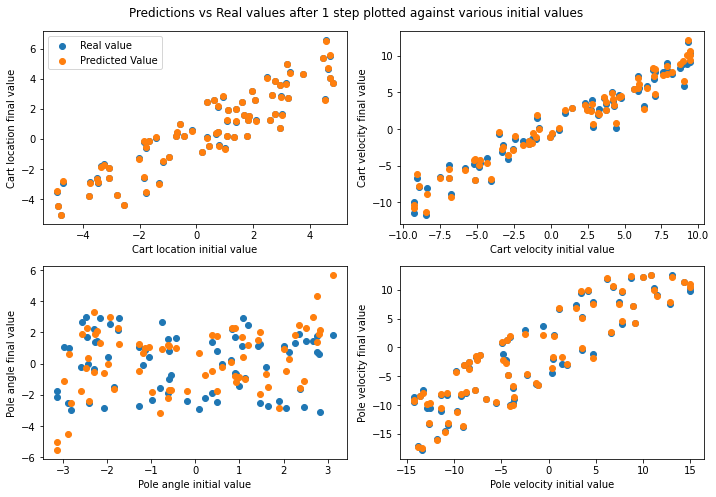

In [241]:
vertical_plot(test_x,test_y+test_x,non_lin_prediction(train_x,train_y,test_x,160)+test_x)
rmse_calc(test_y,non_lin_prediction(train_x,train_y,test_x,160))

In [128]:
def m_convergence(m_range,train_x,train_y,test_x,test_y):
    for m in m_range:
        print('For m={}, the rmse is {}'.format(m,rmse_calc(test_y,non_lin_prediction(train_x,train_y,test_x,m))))

In [243]:
m_convergence([10,20,40,80,160,320],train_x,train_y,test_x,test_y)

For m=10, the rmse is [0.20290632 1.36304908 2.73712715 4.0462541 ]
For m=20, the rmse is [0.16351927 1.26999795 2.37750154 3.64631352]
For m=40, the rmse is [0.07846571 0.72121022 1.97904778 0.73284701]
For m=80, the rmse is [0.03291451 0.41327543 1.86337148 0.47036776]
For m=160, the rmse is [0.03031936 0.39148617 1.5525631  0.40376326]
For m=320, the rmse is [0.01276206 0.29682922 1.5072295  0.3583276 ]


In [152]:
"""
for n=2000:
    For m=10, the rmse is (0.25106681060838015, 1.6852085520742015, 2.7203035657177472, 4.353536542750408)
For m=20, the rmse is (0.18372568515615922, 1.650307435421094, 2.5596568322986166, 4.140960128099368)
For m=40, the rmse is (0.09111333308782125, 0.7120898965677397, 2.1404982254799982, 0.7866119476104256)
For m=80, the rmse is (0.030690497168975338, 0.4271673095728812, 1.816880505654696, 0.4144724950923416)
For m=160, the rmse is (0.027916602231817706, 0.3617820155534925, 1.5084153327625796, 0.39733437818645206)

for n=1500:

For m=10, the rmse is (0.1856575002984317, 1.3635704638065878, 2.731408171767022, 4.075890725025674)
For m=20, the rmse is (0.1616395749213831, 1.3938538859370044, 2.6189688815901766, 4.06610413563002)
For m=40, the rmse is (0.08820552440053198, 0.7463943756440514, 2.083295684280691, 1.2203678678360055)
For m=80, the rmse is (0.033948317273899846, 0.4306619086022289, 1.8874391131045536, 0.4629076947281347)
For m=160, the rmse is (0.03335354451719709, 0.40271012476551066, 1.4881827127962495, 0.41376207873640786)

for n=1000:
    For m=10, the rmse is (0.18473977832762675, 1.696170861975565, 2.403709825942963, 4.487275031366665)
For m=20, the rmse is (0.1588241340601051, 1.551065692872992, 2.3364973152004493, 3.3054918443467014)
For m=40, the rmse is (0.0683755439024367, 0.7438559293575902, 2.079763449410819, 0.8669136692073584)
For m=80, the rmse is (0.03531098152177287, 0.4396147591156683, 1.918913978358327, 0.38302489264060036)
For m=160, the rmse is (0.030679253581510565, 0.4146162917446082, 1.8713849398351188, 0.3493850931882094)

for n=500:
    For m=10, the rmse is (0.19735545128913093, 1.940906776659866, 2.9799008146182957, 4.458815485410335)
For m=20, the rmse is (0.20860808240230644, 1.8524804157227568, 2.946929663864565, 4.330833456211963)
For m=40, the rmse is (0.09862725888885744, 0.9105842849026573, 2.16922520120706, 0.799599557894695)
For m=80, the rmse is (0.03662217756185882, 0.4876678456066281, 1.8052562859334023, 0.47618590320168896)
For m=160, the rmse is (0.04232109018714345, 0.4977434606303097, 2.171599016011658, 0.6606538831587996)
"""
n500 = np.array([[0.19735545128913093, 1.940906776659866, 2.9799008146182957, 4.458815485410335],[0.20860808240230644, 1.8524804157227568, 2.946929663864565, 4.330833456211963],[0.09862725888885744, 0.9105842849026573, 2.16922520120706, 0.799599557894695],[0.03662217756185882, 0.4876678456066281, 1.8052562859334023, 0.47618590320168896],[0.04232109018714345, 0.4977434606303097, 2.171599016011658, 0.6606538831587996]])

n1000 = np.array([[0.18473977832762675, 1.696170861975565, 2.403709825942963, 4.487275031366665],[0.1588241340601051, 1.551065692872992, 2.3364973152004493, 3.3054918443467014],[0.0683755439024367, 0.7438559293575902, 2.079763449410819, 0.8669136692073584],[0.03531098152177287, 0.4396147591156683, 1.918913978358327, 0.38302489264060036],[0.030679253581510565, 0.4146162917446082, 1.8713849398351188, 0.3493850931882094]])

n1500 =np.array([[0.1856575002984317, 1.3635704638065878, 2.731408171767022, 4.075890725025674],[0.1616395749213831, 1.3938538859370044, 2.6189688815901766, 4.06610413563002],[0.08820552440053198, 0.7463943756440514, 2.083295684280691, 1.2203678678360055],[0.033948317273899846, 0.4306619086022289, 1.8874391131045536, 0.4629076947281347],[0.03335354451719709, 0.40271012476551066, 1.4881827127962495, 0.41376207873640786]])
n2000 = np.array([[0.25106681060838015, 1.6852085520742015, 2.7203035657177472, 4.353536542750408],[0.18372568515615922, 1.650307435421094, 2.5596568322986166, 4.140960128099368],[0.09111333308782125, 0.7120898965677397, 2.1404982254799982, 0.7866119476104256],[0.030690497168975338, 0.4271673095728812, 1.816880505654696, 0.4144724950923416],[0.027916602231817706, 0.3617820155534925, 1.5084153327625796, 0.39733437818645206]])

In [158]:
def plot_nm_convergence(n500,n1000,n1500,n2000):
    x_axis = [10,20,40,80,160]
    fig, axs = plt.subplots(2, 2, figsize=(17, 11))

    
    axs[0,0].plot(x_axis,[y[0] for y in n500],label = 'n=500')
    axs[0,0].plot(x_axis,[y[0] for y in n1000],label = 'n=1000')
    axs[0,0].plot(x_axis,[y[0] for y in n1500],label = 'n=1500')
    axs[0,0].plot(x_axis,[y[0] for y in n2000],label = 'n=2000')
    axs[0,0].legend()

    axs[0,1].plot(x_axis,[y[1] for y in n500],label = 'n=500')
    axs[0,1].plot(x_axis,[y[1] for y in n1000],label = 'n=1000')
    axs[0,1].plot(x_axis,[y[1] for y in n1500],label = 'n=1500')
    axs[0,1].plot(x_axis,[y[1] for y in n2000],label = 'n=2000')

    axs[1,0].plot(x_axis,[y[2] for y in n500],label = 'n=500')
    axs[1,0].plot(x_axis,[y[2] for y in n1000],label = 'n=1000')
    axs[1,0].plot(x_axis,[y[2] for y in n1500],label = 'n=1500')
    axs[1,0].plot(x_axis,[y[2] for y in n2000],label = 'n=2000')

    axs[1,1].plot(x_axis,[y[3] for y in n500],label = 'n=500')
    axs[1,1].plot(x_axis,[y[3] for y in n1000],label = 'n=1000')
    axs[1,1].plot(x_axis,[y[3] for y in n1500],label = 'n=1500')
    axs[1,1].plot(x_axis,[y[3] for y in n2000],label = 'n=2000')

    #lables
    axs[0,0].set_xlabel('number of basis vectors')
    axs[0,0].set_ylabel('Cart location RMSE')

    axs[0,1].set_xlabel('number of basis vectors')
    axs[0,1].set_ylabel('Cart velocity RMSE')

    axs[1,0].set_xlabel('number of basis vectors')
    axs[1,0].set_ylabel('Pole angle RMSE')

    axs[1,1].set_xlabel('number of basis vectors')
    axs[1,1].set_ylabel('Pole velocity RMSE')

    fig.tight_layout()


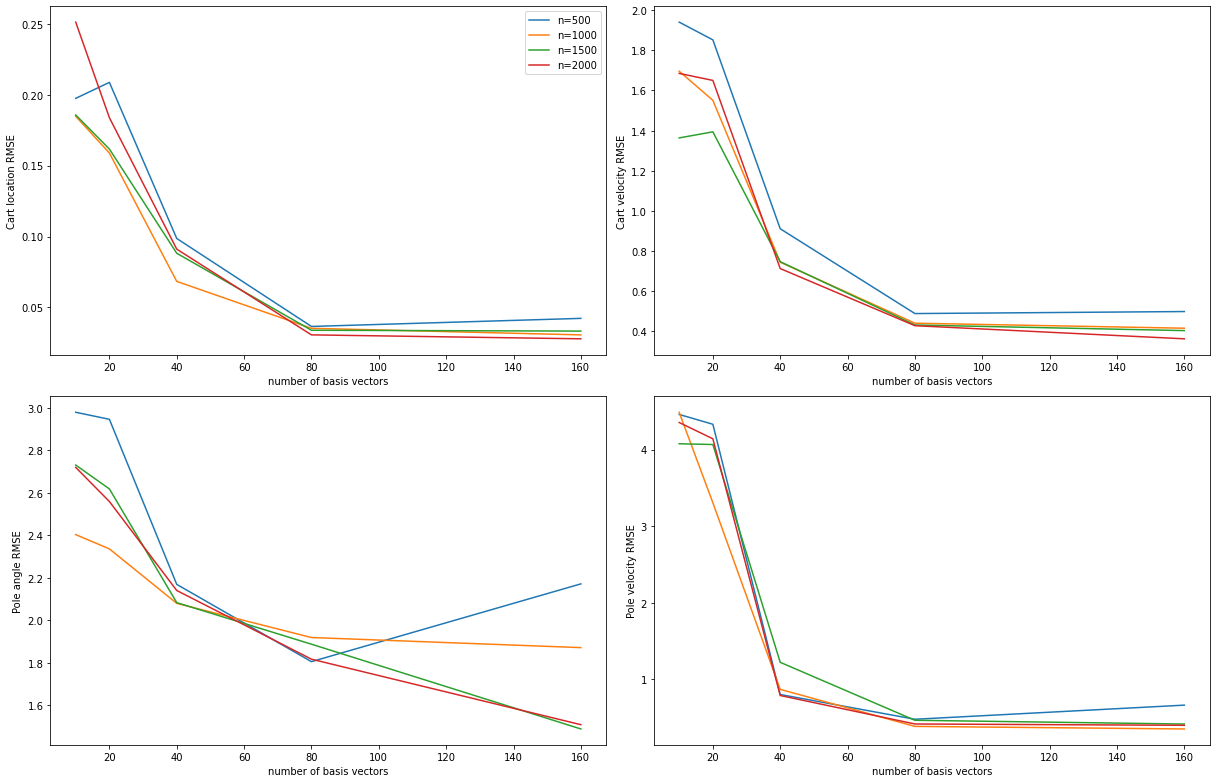

In [159]:
plot_nm_convergence(n500,n1000,n1500,n2000)

## Task 2.1

In [122]:

def non_linear_one_step_difference_with_predictions(variable, x_axis_range, x_axis_intervals,m):
    initial = [-0.24,-9.27,-1.07,9.09]
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1
    pred = np.zeros((4))
    for i in x_axis:
        initial[variable] = i
        x_t = start_the_cart(initial, steps=steps, display_plots=False,remap_angle=True)
        real = x_t-initial
        pred = non_linear_model(initial,train_x,train_y,0.00001,m)
        try: 
            final_y = np.vstack((final_y, np.array(real)))
            final_pred = np.vstack((final_pred,np.array(pred)))
        except:
            final_y = np.array(real)
            final_pred = np.array(pred)



    return x_axis,final_y,final_pred

In [123]:
x_axis1, c_l_real,c_l_pred = non_linear_one_step_difference_with_predictions(0,[-5,5],15,10)
print(c_l_pred.shape)

(15, 4)


In [124]:
def non_linear_together_plot(m):
    x_axis1, c_l_real,c_l_pred = non_linear_one_step_difference_with_predictions(0,[-5,5],15,m)
    x_axis2,c_v_real,c_v_pred = non_linear_one_step_difference_with_predictions(1,[-10,10],15,m)
    x_axis3,p_a_real,p_a_pred = non_linear_one_step_difference_with_predictions(2,[-np.pi,np.pi],15,m)
    x_axis4,p_v_real,p_v_pred = non_linear_one_step_difference_with_predictions(3,[-15,15],15,m)

    fig, axs = plt.subplots(2, 2, figsize=(17, 11))
    for i in range(4):
        axs[0,0].plot(x_axis1, [y[i] for y in c_l_real],label='Real {}'.format(variable_number[i]))
        axs[0,0].scatter(x_axis1, [y[i] for y in c_l_pred],label='Predicted {}'.format(variable_number[i]))
        
        
        
        axs[0,1].plot(x_axis2, [y[i] for y in c_v_real],label='Real c_v')
        axs[0,1].scatter(x_axis2, [y[i] for y in c_v_pred],label='Predicted c_v')

        axs[1,0].plot(x_axis3, [y[i] for y in p_a_real],label='Real p_a')
        axs[1,0].scatter(x_axis3, [y[i] for y in p_a_pred],label='Predicted p_a')
        
        axs[1,1].plot(x_axis4, [y[i] for y in p_v_real],label='Real p_v')
        axs[1,1].scatter(x_axis4, [y[i] for y in p_v_pred],label='Predicted p_v')

        
        axs[0,0].legend()


    axs[0,0].set_xlabel('Initial value of cart location')
    axs[0,0].set_ylabel('Cart dynamics changes')

    axs[0,1].set_xlabel('Initial value of cart velocity')
    axs[0,1].set_ylabel('Cart dynamics changes')

    axs[1,0].set_xlabel('Initial value of pole angle')
    axs[1,0].set_ylabel('Cart dynamics changes')

    axs[1,1].set_xlabel('Initial value of pole velocity')
    axs[1,1].set_ylabel('Cart dynamics changes')

    fig.tight_layout()
    
        
    plt.show()

In [125]:
print (initialize)

[ 2.0866375   9.41911802  2.68059539 -3.20969788]


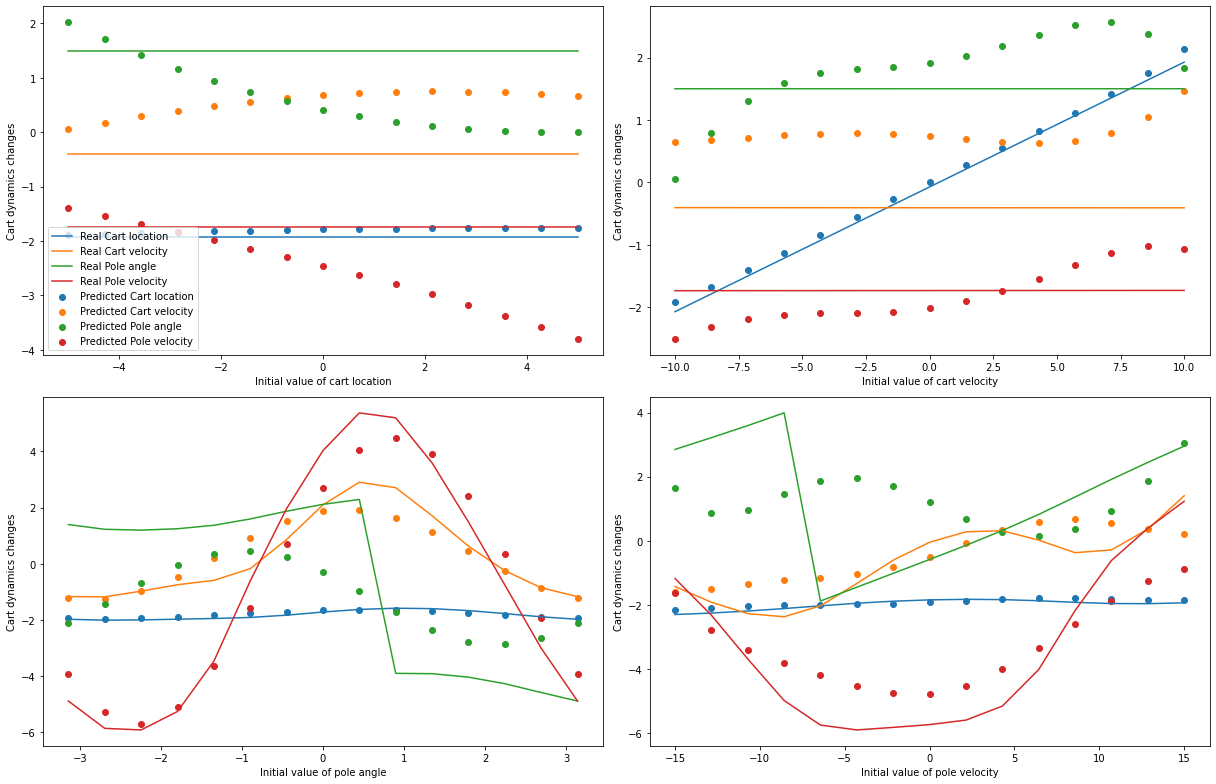

In [126]:
non_linear_together_plot(40)

In [166]:
def non_linear_future_predictions_from_predictions(initial_conditions, time_steps,m,remap_angle=True):
    final_y=np.array(initial_conditions)
    final_pred=np.array(initial_conditions)

    for i in range(time_steps):
        real= start_the_cart(final_y[i], steps=1, display_plots=False,remap_angle=remap_angle)
        pred = non_linear_model(final_pred[i],train_x,train_y,0.00001,m)
        pred+=final_pred[i]

         
        final_y = np.vstack((final_y, np.array(real)))
        final_pred = np.vstack((final_pred,np.array(pred)))

    x_axis=np.linspace(0,time_steps,time_steps+1)
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0,0].plot(x_axis, [y[0] for y in final_y],label='Real value')
    axs[0,0].plot(x_axis, [y[0] for y in final_pred],label='Predicted value')
    axs[0,0].legend()
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])
    axs[0,1].plot(x_axis, [y[1] for y in final_pred])

    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    axs[1,0].plot(x_axis, [y[2] for y in final_pred])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    axs[1,1].plot(x_axis, [y[3] for y in final_pred])
    

    #Set titles
            
    axs[0,0].set_xlabel('Time steps')
    axs[0,0].set_ylabel('Cart location')

    
    axs[0,1].set_xlabel('Time steps')
    axs[0,1].set_ylabel('Cart velocity')

    
    axs[1,0].set_xlabel('Time steps')
    axs[1,0].set_ylabel('Pole angle')

    
    axs[1,1].set_xlabel('Time steps')
    axs[1,1].set_ylabel('Pole velocity')

    fig.suptitle('Predicted (from predictions) vs Real change in cart dynamics over time with initial conditions {}'.format(initial_conditions),fontsize=16)

    fig.tight_layout()

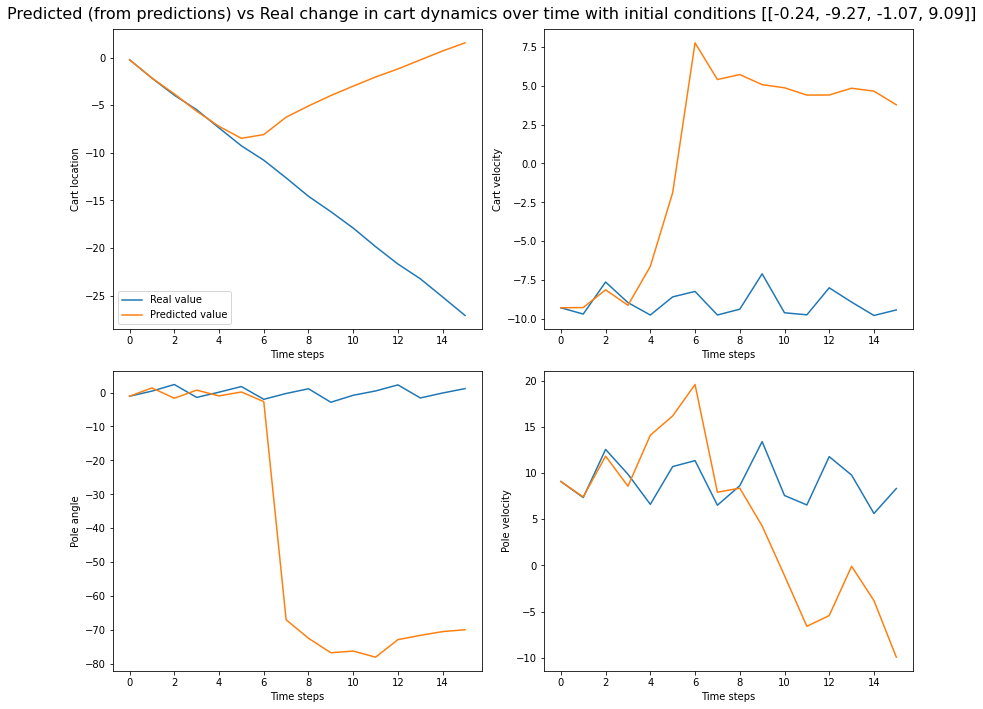

In [177]:
non_linear_future_predictions_from_predictions([[-0.24,-9.27,-1.07,9.09]], 15,160,remap_angle=True)

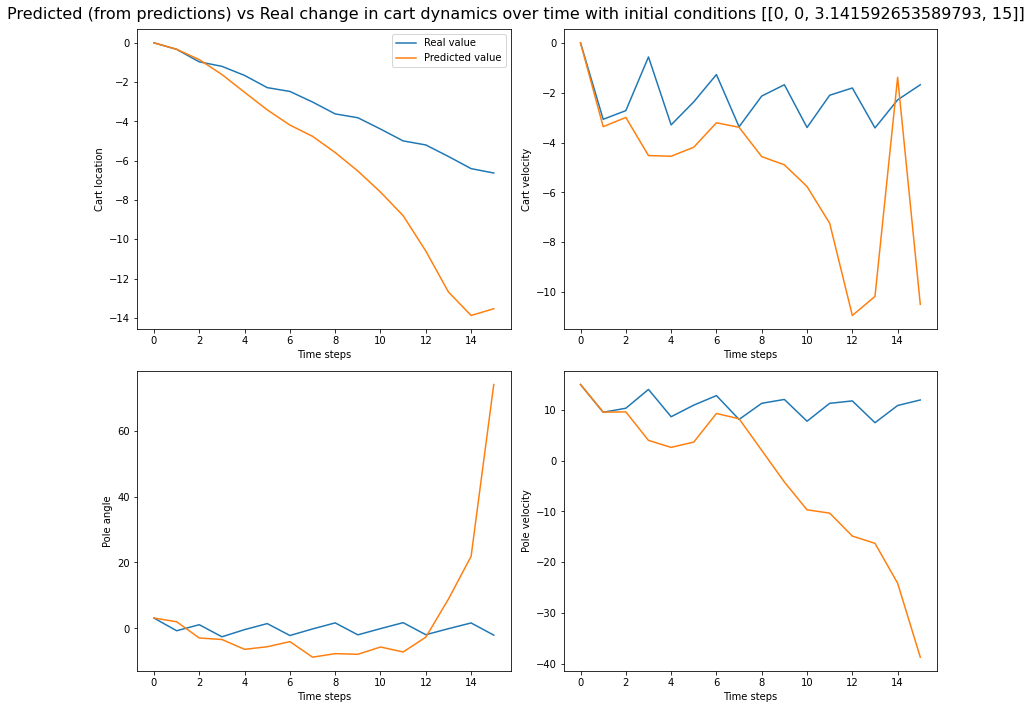

In [178]:
non_linear_future_predictions_from_predictions([[0,0,np.pi,15]], 15,160,remap_angle=True)

In [172]:
def non_linear_future_predictions_from_real(initial_conditions, time_steps,m,remap_angle=True):
    final_y=np.array(initial_conditions)
    final_pred=np.array(initial_conditions)

    for i in range(time_steps):
        real= start_the_cart(final_y[i], steps=1, display_plots=False,remap_angle=remap_angle)
        pred = non_linear_model(final_y[i],train_x,train_y,0.00001,m)
        pred+=final_y[i]

         
        final_y = np.vstack((final_y, np.array(real)))
        final_pred = np.vstack((final_pred,np.array(pred)))

    x_axis=np.linspace(0,time_steps,time_steps+1)
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0,0].plot(x_axis, [y[0] for y in final_y],label='Real value')
    axs[0,0].plot(x_axis, [y[0] for y in final_pred],label='Predicted value')
    axs[0,0].legend()
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])
    axs[0,1].plot(x_axis, [y[1] for y in final_pred])

    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    axs[1,0].plot(x_axis, [y[2] for y in final_pred])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    axs[1,1].plot(x_axis, [y[3] for y in final_pred])
    

    #Set titles
            
    axs[0,0].set_xlabel('Time steps')
    axs[0,0].set_ylabel('Cart location')

    
    axs[0,1].set_xlabel('Time steps')
    axs[0,1].set_ylabel('Cart velocity')

    
    axs[1,0].set_xlabel('Time steps')
    axs[1,0].set_ylabel('Pole angle')

    
    axs[1,1].set_xlabel('Time steps')
    axs[1,1].set_ylabel('Pole velocity')

    fig.suptitle('Predicted (from recent dynamics) vs Real change in cart dynamics over time with initial conditions {}'.format(initial_conditions),fontsize=16)

    fig.tight_layout()

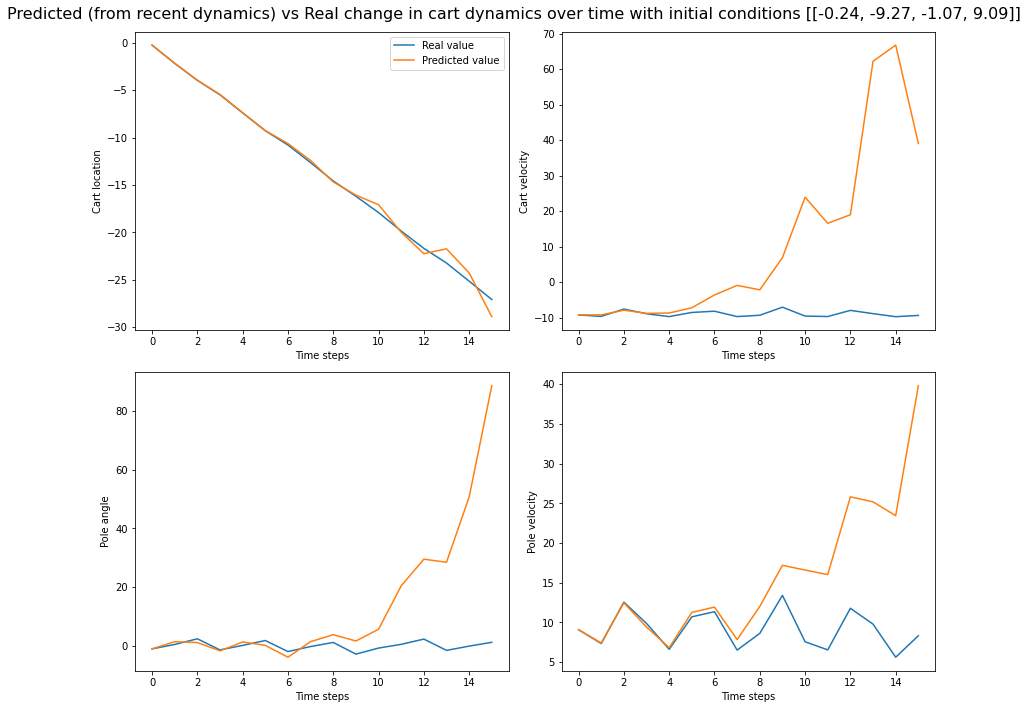

In [176]:
non_linear_future_predictions_from_real([[-0.24,-9.27,-1.07,9.09]], 15,160,remap_angle=True)

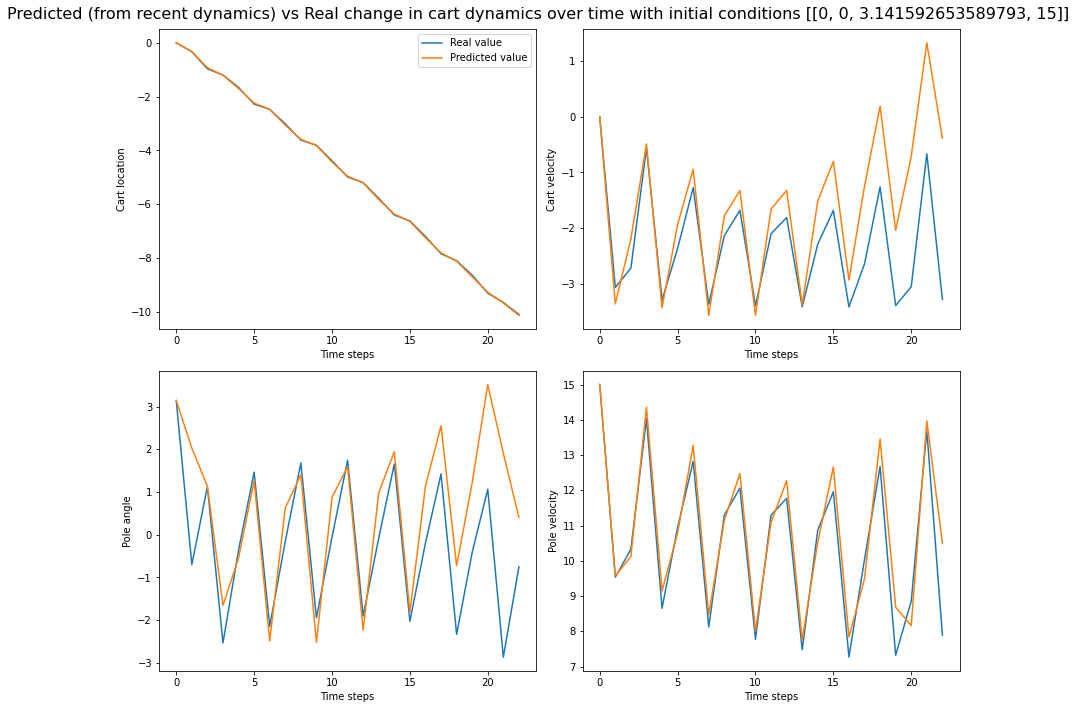

In [180]:
non_linear_future_predictions_from_real([[0,0,np.pi,15]], 22,160,remap_angle=True)

In [193]:
"""
different_pairs = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
axes_ranges = {0 : np.linspace(-5,5,10), 1 : np.linspace(-10,10,10), 2 : np.linspace(-np.pi,np.pi,10), 3 : np.linspace(-15,15,10)}

def axes_for_pairs(index_pair):
    range_of_variables = []
    for index in index_pair:
        range_of_variables.append(axes_ranges[index])
    return range_of_variables
"""
def non_linear_contours_of_pairs(index_pair, range_of_variables):
  
   
    index_1, index_2 = index_pair
    range_1, range_2 = range_of_variables
    
    initial_grid = np.zeros((len(range_1),len(range_2),4))
    final_grid = np.zeros((len(range_1),len(range_2),4))
    
    for i,value_1 in enumerate(range_1):
        for j, value_2 in enumerate(range_2):
            x = [-0.24,-9.27,-1.07,9.09]
            x[index_1] = value_1
            x[index_2] = value_2
            initial_grid[i,j] = x
            final_grid[i,j] = np.array(non_linear_model(x,train_x,train_y,0.00001,80))
                            
    y_grid = final_grid - initial_grid
    y_grid = np.moveaxis(y_grid, -1, 0)   
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 9))
    
    axs[0,0].contourf(range_1, range_2, y_grid[0].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[0,0].set_title('cart_location')
    axs[0,0].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[0,0].set_ylabel('{} initial value'.format(variable_number[index_2]))   

    axs[0,1].contourf(range_1, range_2, y_grid[1].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[0,1].set_title('cart_velocity')
    axs[0,1].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[0,1].set_ylabel('{} initial value'.format(variable_number[index_2]))

    axs[1,0].contourf(range_1, range_2, y_grid[2].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[1,0].set_title('pole_angle')
    axs[1,0].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[1,0].set_ylabel('{} initial value'.format(variable_number[index_2]))

    axs[1,1].contourf(range_1, range_2, y_grid[3].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[1,1].set_title('pole_velocity')
    axs[1,1].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[1,1].set_ylabel('{} initial value'.format(variable_number[index_2]))
    
    fig.tight_layout()

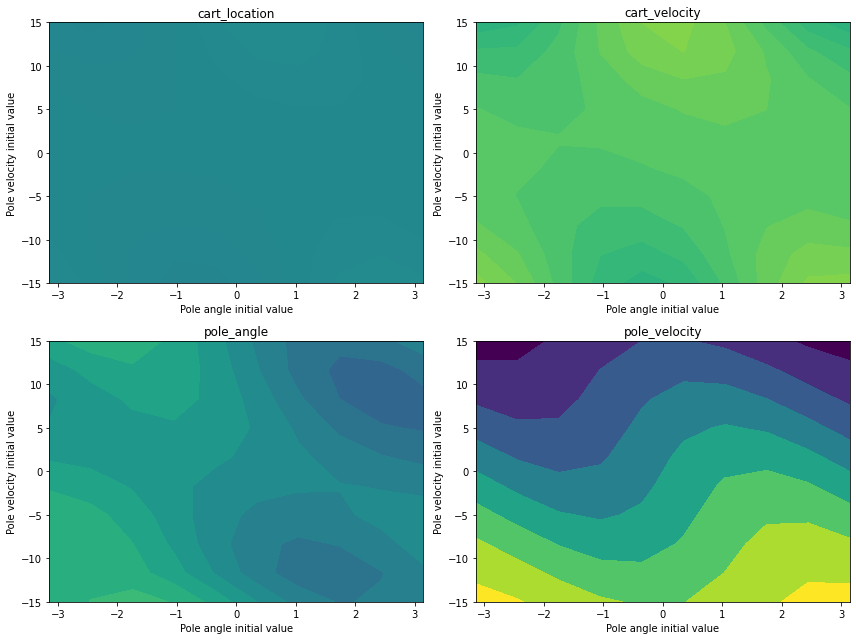

In [194]:
"""
for indices in different_pairs:
     print('Plots of {} and {}'.format(variable_number[indices[0]],variable_number[indices[1]]))
     contours_of_pairs(indices, axes_for_pairs(indices))
     plt.show()
"""  
non_linear_contours_of_pairs([2,3], axes_for_pairs([2,3]))

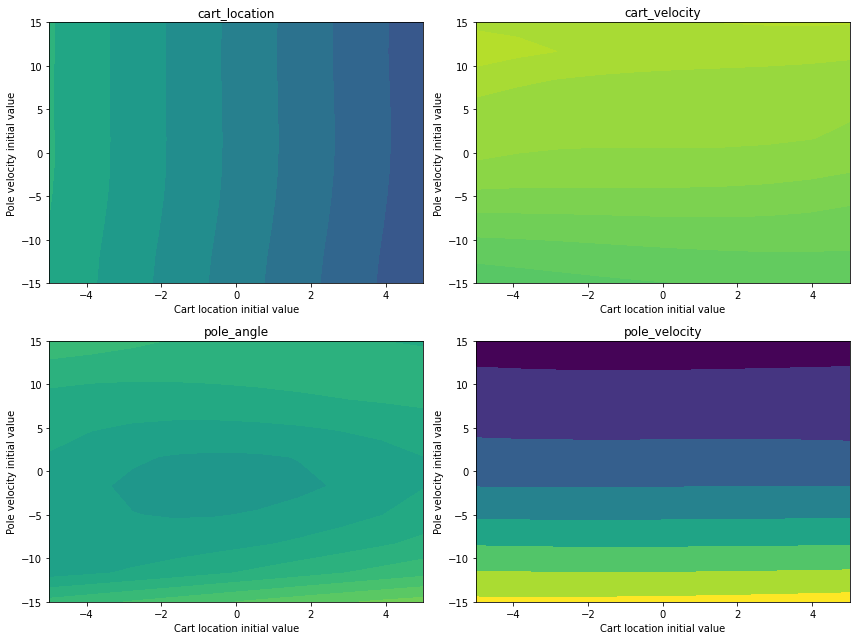

In [195]:
non_linear_contours_of_pairs([0,3], axes_for_pairs([0,3]))

In [196]:
def contours_of_pairs2(index_pair, range_of_variables):
  
   
    index_1, index_2 = index_pair
    range_1, range_2 = range_of_variables
    
    initial_grid = np.zeros((len(range_1),len(range_2),4))
    final_grid = np.zeros((len(range_1),len(range_2),4))
    
    for i,value_1 in enumerate(range_1):
        for j, value_2 in enumerate(range_2):
            x = [-0.24,-9.27,-1.07,9.09]
            x[index_1] = value_1
            x[index_2] = value_2
            initial_grid[i,j] = x
            final_grid[i,j] = np.array(start_the_cart(x, steps=1, display_plots=False))
                            
    y_grid = final_grid - initial_grid
    y_grid = np.moveaxis(y_grid, -1, 0)   
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 9))
    
    axs[0,0].contourf(range_1, range_2, y_grid[0].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[0,0].set_title('cart_location')
    axs[0,0].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[0,0].set_ylabel('{} initial value'.format(variable_number[index_2]))   

    axs[0,1].contourf(range_1, range_2, y_grid[1].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[0,1].set_title('cart_velocity')
    axs[0,1].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[0,1].set_ylabel('{} initial value'.format(variable_number[index_2]))

    axs[1,0].contourf(range_1, range_2, y_grid[2].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[1,0].set_title('pole_angle')
    axs[1,0].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[1,0].set_ylabel('{} initial value'.format(variable_number[index_2]))

    axs[1,1].contourf(range_1, range_2, y_grid[3].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[1,1].set_title('pole_velocity')
    axs[1,1].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[1,1].set_ylabel('{} initial value'.format(variable_number[index_2]))
    
    fig.tight_layout()

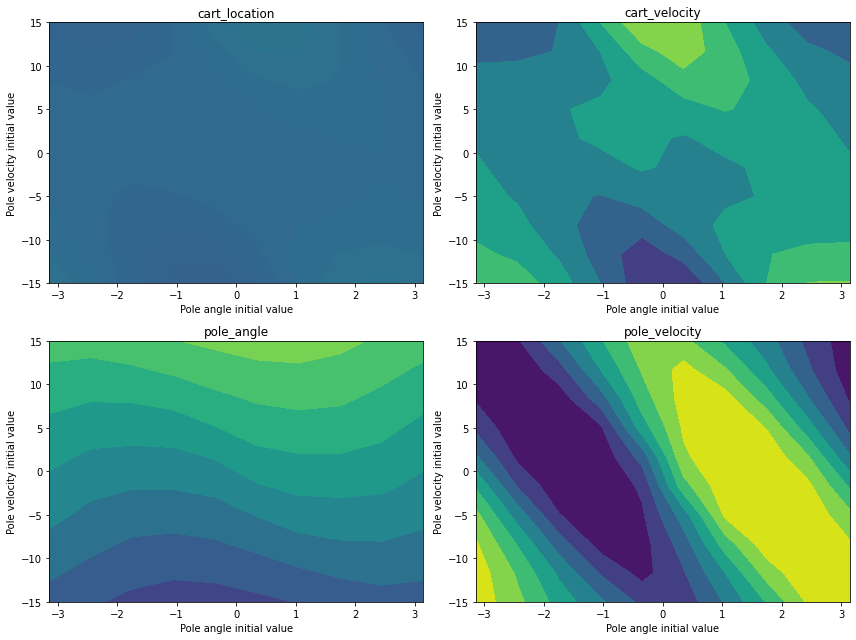

In [197]:
contours_of_pairs2([2,3], axes_for_pairs([2,3]))

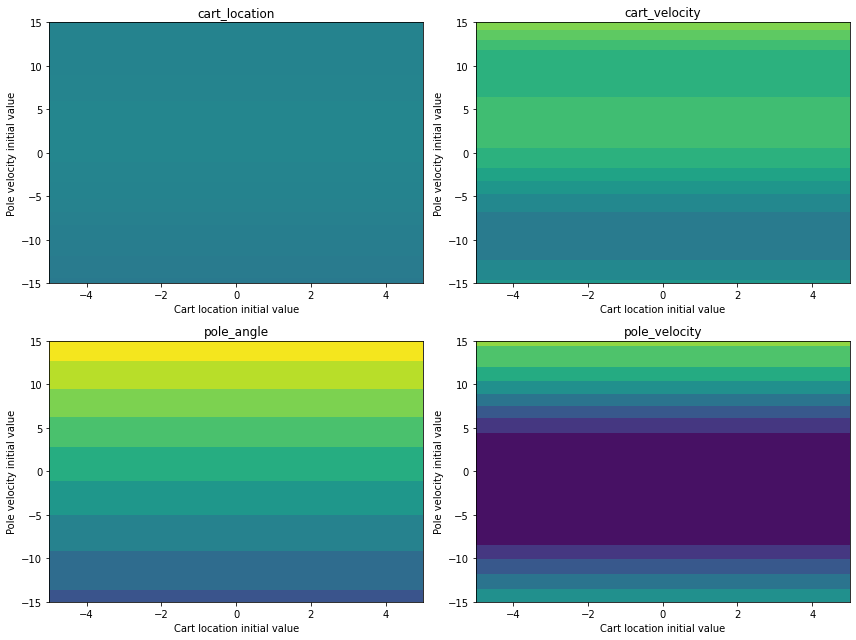

In [198]:
contours_of_pairs2([0,3], axes_for_pairs([0,3]))